In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
data = pd.read_csv('D:\Github projects\All-Space-mission-/space_Corrected.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [4]:
data.describe()

,Unnamed: 0,Unnamed: 0.1
count,4324.000000,4324.000000
mean,2161.500000,2161.500000
std,1248.375611,1248.375611
min,0.000000,0.000000
25%,1080.750000,1080.750000
50%,2161.500000,2161.500000
75%,3242.250000,3242.250000
max,4323.000000,4323.000000


In [5]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Feature Engineering and Data Cleaning

This is just after the checking the dataset and I keep changing the dataset as required while visulization

In [6]:
data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [7]:
data['Location']

0              LC-39A, Kennedy Space Center, Florida, USA
1       Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
2                           Pad A, Boca Chica, Texas, USA
3            Site 200/39, Baikonur Cosmodrome, Kazakhstan
4                SLC-41, Cape Canaveral AFS, Florida, USA
                              ...                        
4319             LC-18A, Cape Canaveral AFS, Florida, USA
4320             LC-26A, Cape Canaveral AFS, Florida, USA
4321             LC-18A, Cape Canaveral AFS, Florida, USA
4322            Site 1/5, Baikonur Cosmodrome, Kazakhstan
4323            Site 1/5, Baikonur Cosmodrome, Kazakhstan
Name: Location, Length: 4324, dtype: object

In [8]:
data['Country'] = data.Location.apply(lambda x : x.split()[-1])

In [9]:
data.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


# Data Visualization

#### Lets first analyse how many missions were successful and how many of them were failure using countplot and pie chart.

In [19]:
# percentage calculation
success = data['Status Mission'].isin(['Success']).sum()
Failure = data['Status Mission'].isin(['Failure']).sum()
Partial_failure = data['Status Mission'].isin(['Partial_failure']).sum()
Prelaunch_failure = data['Status Mission'].isin(['Prelaunch Failure']).sum()
print('The percentage of success',success/len(data['Status Mission'])*100,'%')
print('The percentage of Failure',Failure/len(data['Status Mission'])*100,'%')
print('The percentage of Partial_failure',Partial_failure/len(data['Status Mission'])*100,'%')
print('The percentage of Prelaunch Failure',Prelaunch_failure/len(data['Status Mission'])*100,'%')

The percentage of success 89.70860314523588 %
The percentage of Failure 7.8399629972247915 %
The percentage of Partial_failure 0.0 %
The percentage of Prelaunch Failure 0.09250693802035154 %


([<matplotlib.patches.Wedge at 0x7fdc9b71a090>,
 [Text(-0.8379491928015833, 0.7126297427719215, 'success'),
  Text(0.8320640366901252, -0.7194924869982551, 'failure'),
  Text(1.1998378890434946, -0.019724097334238844, 'partial failure'),
  Text(1.1999594709993602, -0.009862451973803423, 'prelaunch_failure')],
 [Text(-0.45706319607359086, 0.38870713242104804, '77.6%'),
  Text(0.4538531109218864, -0.39245044745359364, '22.2%'),
  Text(0.6999054352753719, -0.011505723444972658, '0.0%'),
  Text(0.6999763580829601, -0.0057530969847186635, '0.3%')])

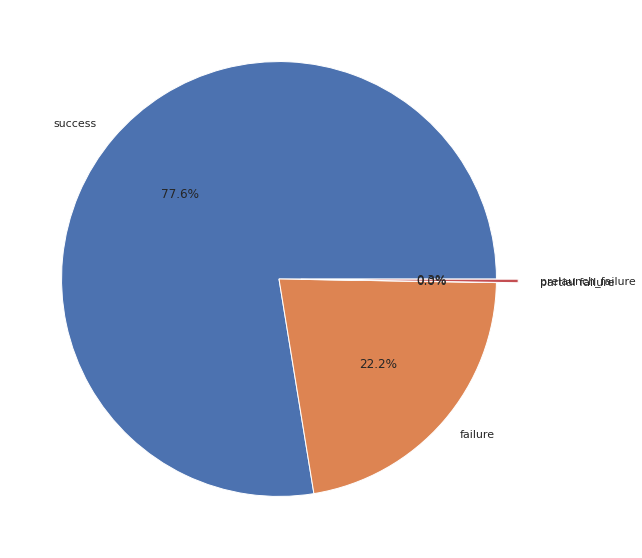

In [99]:
plt.figure(figsize=(10,10))
labels = ['success','failure','partial failure','prelaunch_failure']
percentages = [success,Failure,Partial_failure, Prelaunch_failure]
plt.pie(percentages, labels = labels,explode=[0,0,0.1,0.1], autopct='%1.1f%%',shadow= False)

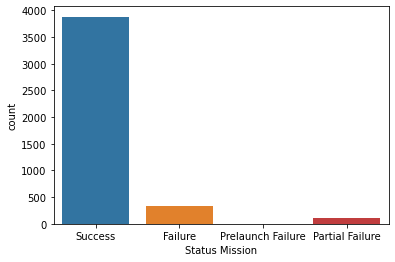

In [11]:
sns.countplot(data['Status Mission'])

### Analysis on the basis of company who manufactured. 

In [12]:
data['Company Name'].value_counts()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Eurockot              13
Rocket Lab            13
ESA                   13
ISA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
AMBA                   8
CNES                   8
MITT                   7
Land Launch            7
JAXA                   7
KCST                   5
CASIC                  5
UT                     5
CECLES                 4
Arm??e de l'Air        4
Exos                   4


### The plot gets clumsy if each and every company is plotted on it, so plotting some of the well known company. 

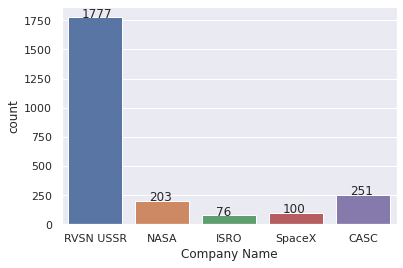

In [35]:
ax = sns.countplot(x = 'Company Name',data=data,order=['RVSN USSR','NASA','ISRO','SpaceX','CASC'])
for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x()+0.2, p.get_height()))

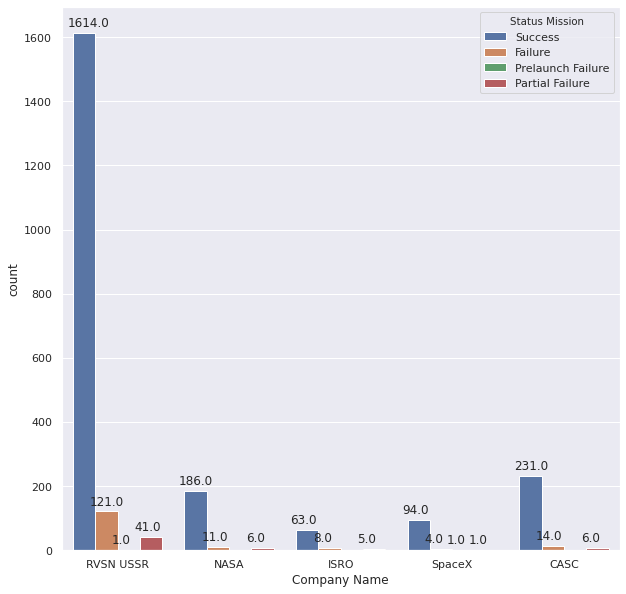

In [98]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
ax = sns.countplot(x = 'Company Name',data=data,order=['RVSN USSR','NASA','ISRO','SpaceX','CASC'],hue= "Status Mission",)
for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x()-0.05, p.get_height()+20))

### Classifying the databased on success and failure of the mission by the most popular companies

### Now I would analyse on the basis of the country who have launched the mission

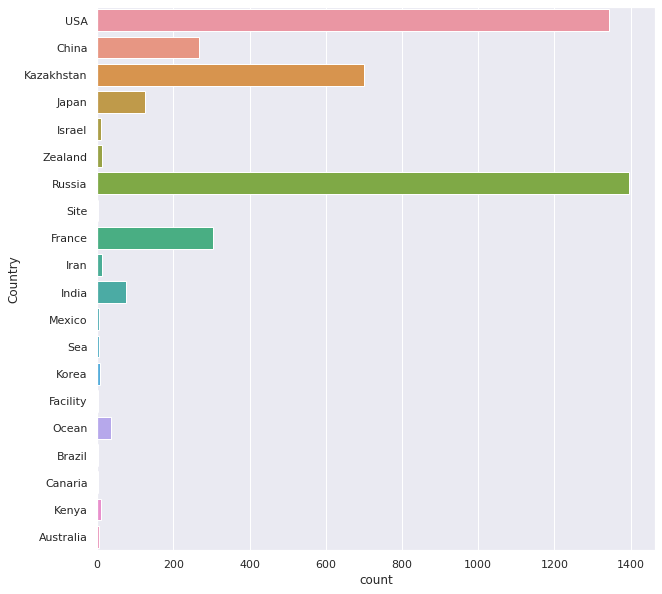

In [94]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
sns.countplot(y = 'Country',data=data)

### Russia and USA have done the most number of space mission

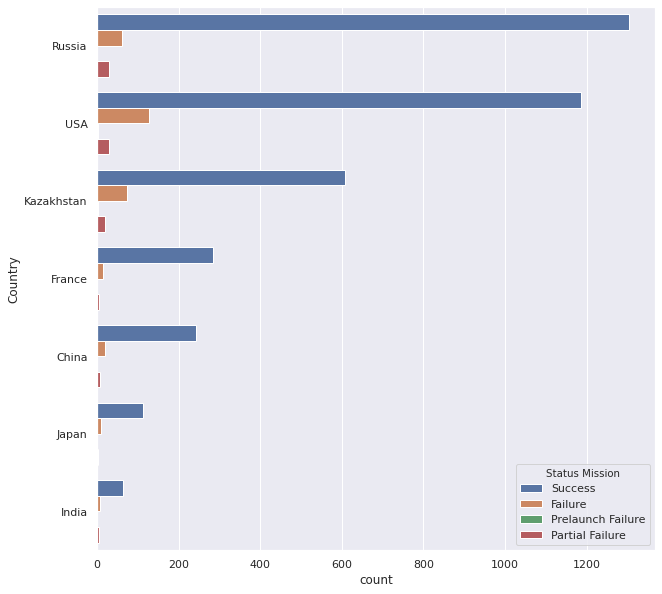

In [93]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
sns.countplot(y = 'Country',data=data,order=['Russia','USA','Kazakhstan','France','China','Japan','India'],hue='Status Mission')

([<matplotlib.patches.Wedge at 0x7fdca0d00d50>,
 [Text(0.3499974890638971, 1.0428335234585469, 'USA'),
  Text(-0.8778913381190246, -0.6628022317822931, 'Russia'),
  Text(0.6381129516743251, -0.8959976902344562, 'China'),
  Text(0.9676694922532394, -0.7096588995865254, 'India'),
  Text(1.0568171159379334, -0.305184507242142, 'France')],
 [Text(0.19090772130758024, 0.5688182855228436, '39.7%'),
  Text(-0.4788498207921952, -0.3615284900630689, '41.2%'),
  Text(0.34806161000417735, -0.4887260128551579, '7.9%'),
  Text(0.5644738704810562, -0.41396769142547307, '2.2%'),
  Text(0.576445699602509, -0.166464276677532, '8.9%')])

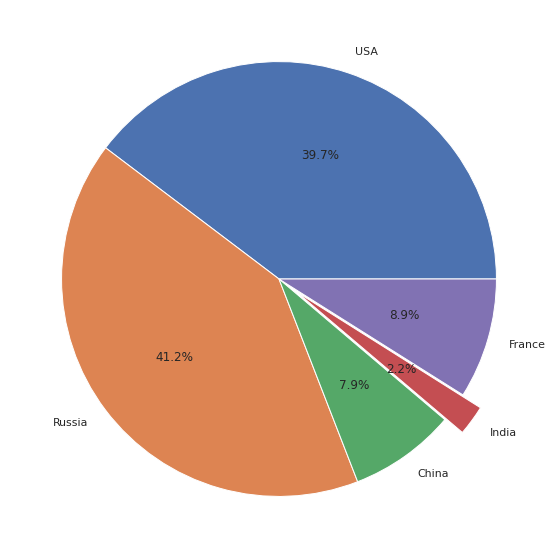

In [92]:

plt.figure(figsize=(10,10))
country = data.groupby('Country')
per_usa = len(country.get_group('USA'))
per_russia = len(country.get_group('Russia'))
per_china = len(country.get_group('China'))
per_india= len(country.get_group('India'))
per_france = len(country.get_group('France'))
per = [per_usa,per_russia,per_china,per_india,per_france]
labels = ['USA','Russia','China','India','France']
plt.figsize = (20,20)
plt.pie(per,labels= labels,explode=[0,0,0,0.1,0], autopct='%1.1f%%')

### Lets analyze USA space missions 

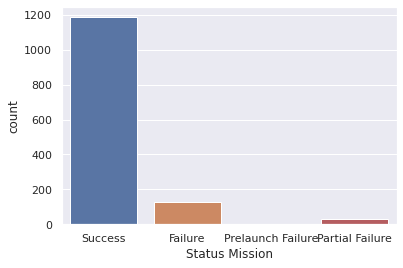

In [74]:
usa = country.get_group('USA')
sns.countplot(usa['Status Mission'])

Text(0.5, 1.0, 'Percentage Suceessful and failed mission by USA ')

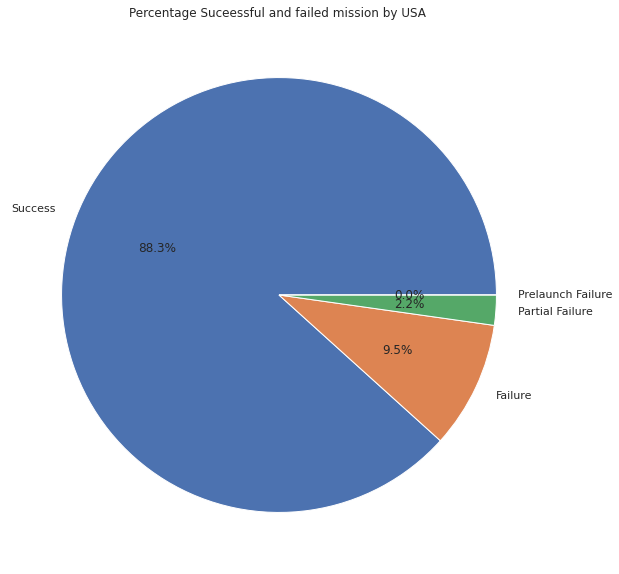

In [122]:
plt.figure(figsize=(10,10))
success = usa['Status Mission'].isin(['Success']).sum()
failure = usa['Status Mission'].isin(['Failure']).sum()
partial_failure = usa['Status Mission'].isin(['Partial Failure']).sum()
prelaunch_failure = usa['Status Mission'].isin(['Prelaunce Failure']).sum()
outcome = [success,failure,partial_failure,prelaunch_failure]
labels = ['Success','Failure','Partial Failure','Prelaunch Failure']
plt.pie(outcome,labels= labels, autopct='%1.1f%%')
plt.title('Percentage Suceessful and failed mission by USA ')


### Russia 

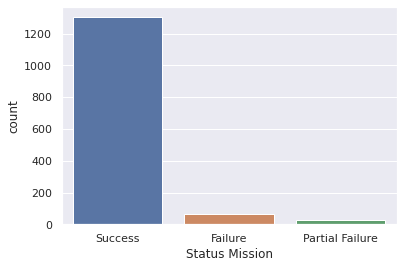

In [80]:
russia = country.get_group('Russia')
sns.countplot(russia['Status Mission'])

Text(0.5, 1.0, 'Percentage Suceessful and failed mission by Russia ')

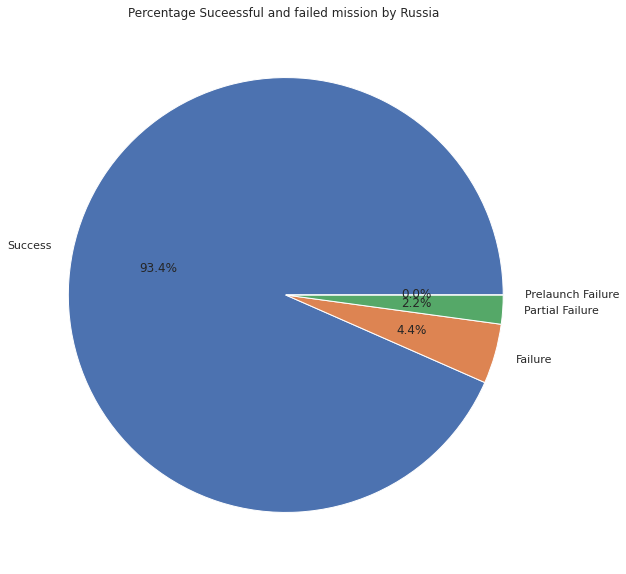

In [123]:
plt.figure(figsize=(10,10))
success = russia['Status Mission'].isin(['Success']).sum()
failure = russia['Status Mission'].isin(['Failure']).sum()
partial_failure = russia['Status Mission'].isin(['Partial Failure']).sum()
prelaunch_failure = russia['Status Mission'].isin(['Prelaunce Failure']).sum()
outcome = [success,failure,partial_failure,prelaunch_failure]
labels = ['Success','Failure','Partial Failure','Prelaunch Failure']
plt.pie(outcome,labels= labels, autopct='%1.1f%%')
plt.title('Percentage Suceessful and failed mission by Russia ')

### India 

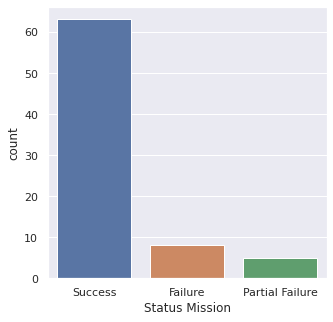

In [89]:
plt.figure(figsize=(5,5))
india = country.get_group('India')
sns.countplot(india['Status Mission'])

Text(0.5, 1.0, 'Percentage Suceessful and failed mission by India ')

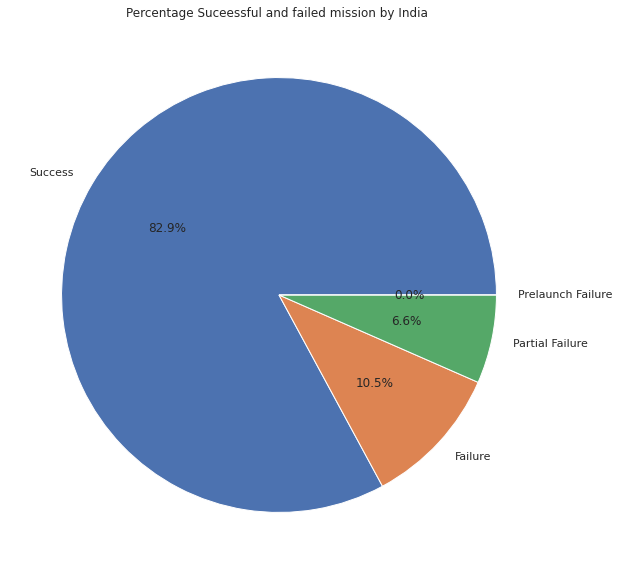

In [121]:
plt.figure(figsize=(10,10))
success = india['Status Mission'].isin(['Success']).sum()
failure = india['Status Mission'].isin(['Failure']).sum()
partial_failure = india['Status Mission'].isin(['Partial Failure']).sum()
prelaunch_failure = india['Status Mission'].isin(['Prelaunce Failure']).sum()
outcome = [success,failure,partial_failure,prelaunch_failure]
labels = ['Success','Failure','Partial Failure','Prelaunch Failure']
plt.pie(outcome,labels= labels, autopct='%1.1f%%')
plt.title('Percentage Suceessful and failed mission by India ')

### Analyzing the feature 'Status Rocket'

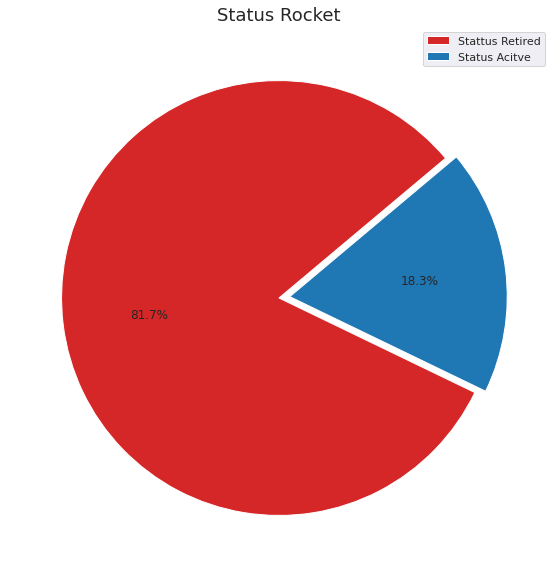

In [85]:
plt.figure(figsize=(10,10))
st = data['Status Rocket'].value_counts()
plt.pie(st,shadow=False,autopct='%1.1f%%',colors=('tab:red', 'tab:blue'),explode=(0,0.05),startangle=40)
plt.legend(['Stattus Retired','Status Acitve'])
plt.title('Status Rocket', fontsize=18)
plt.show()

### visualizing the year wise change in the number of space missions 

In [112]:
data['Year'] = pd.to_datetime(data['Datum']).apply(lambda year: year.year)


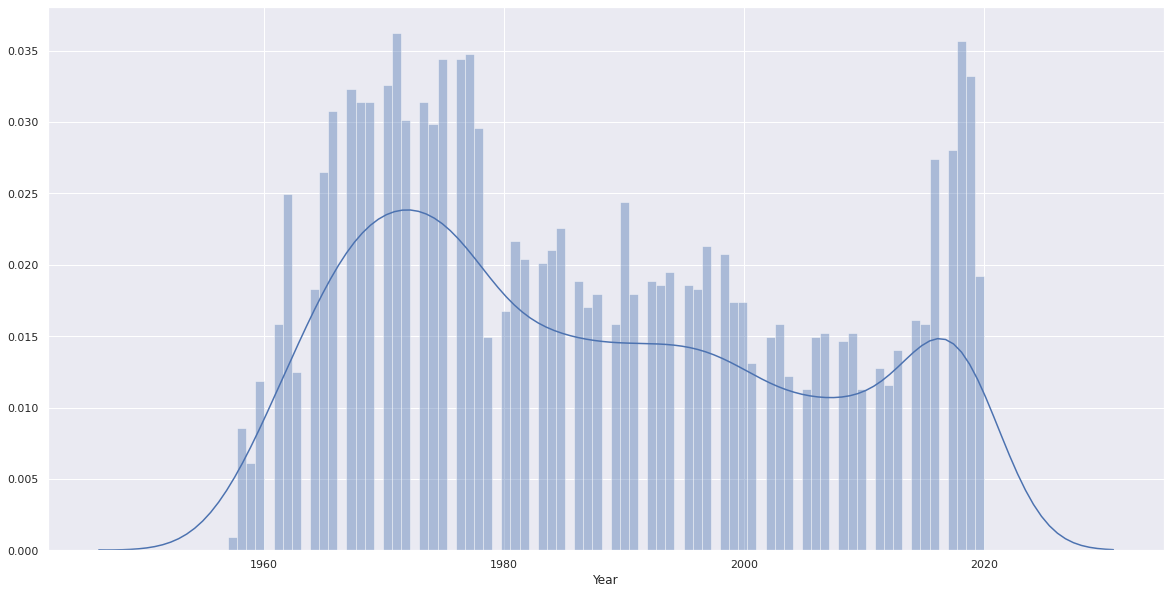

In [111]:
plt.figure(figsize=(20,10))
sns.distplot(data['Year'],bins = 83)

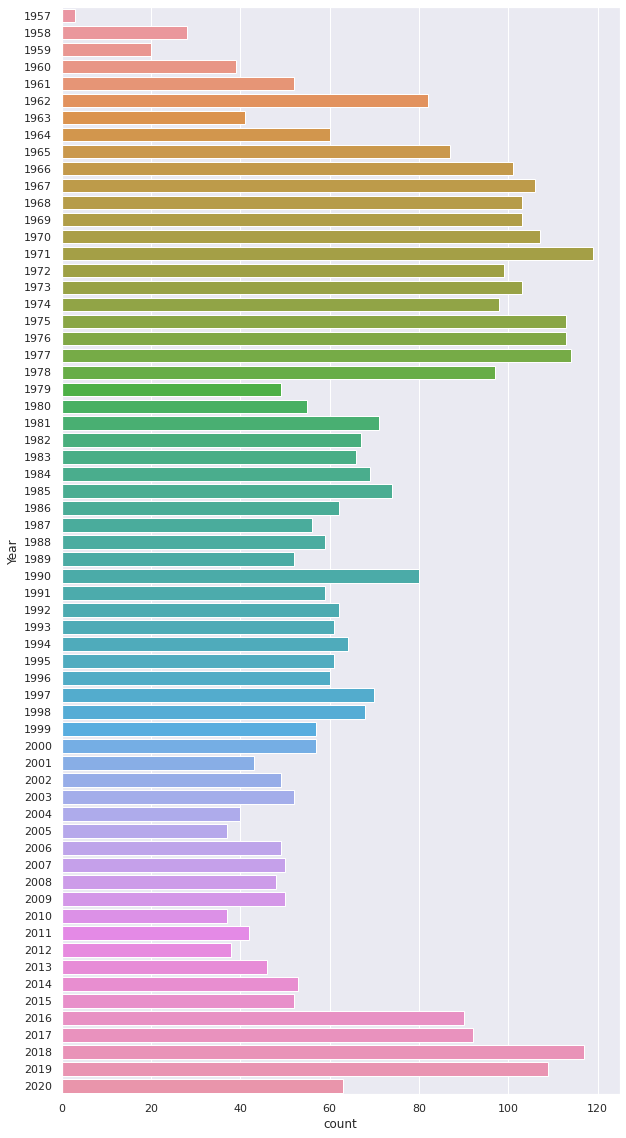

In [120]:

plt.figure(figsize=(10,20))
sns.countplot(y = data['Year'])